In [1]:
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


#IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df= pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-03-31,33.641430,33.801430,33.494286,33.571430,22.726398,107664900
1,2010-04-01,33.915714,34.104286,33.250000,33.709999,22.820208,150786300
2,2010-04-05,33.568573,34.072857,33.538570,34.070000,23.063911,171126900
3,2010-04-06,34.028572,34.320000,33.857143,34.220001,23.165457,111754300
4,2010-04-07,34.221428,34.560001,34.094284,34.371429,23.267965,157125500


#HANDLING CATEGORICAL DATA

In [ ]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
dataset = pd.read_csv('AAPL.csv') 
x = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values 
labelencoder_X = LabelEncoder()
x[:,0] = labelencoder_X.fit_transform(x[:,0])
x[:,1] = labelencoder_X.fit_transform(x[:,1])
print(x)
#Here we are using LabelEncoder

[[0 2 33.801429999999996 33.494285999999995 33.57143 22.726398]
 [1 3 34.104286 33.25 33.709998999999996 22.820207999999997]
 [2 1 34.072857 33.53857 34.07 23.063910999999997]
 ...
 [1180 1150 116.08000200000001 114.639999 115.0 108.419731]
 [1181 1144 114.650002 111.620003 112.400002 105.968506]
 [1182 1139 114.300003 109.349998 114.120003 107.59011100000001]]


In [ ]:
x = dataset[['Open','High','Low','Close','Adj Close'	]]
#separate the other attributes from the predicting attribute

In [ ]:
y = dataset[['Volume']]
#separte the predicting attribute into Y for model training 

#GRAPHS

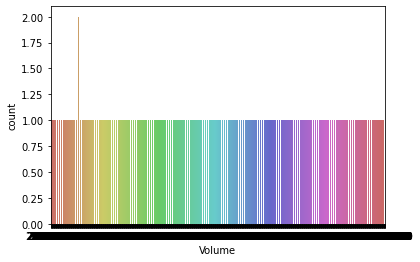

In [ ]:
seaborn.countplot(x='Volume',data=dataset, palette='hls')
plt.show()

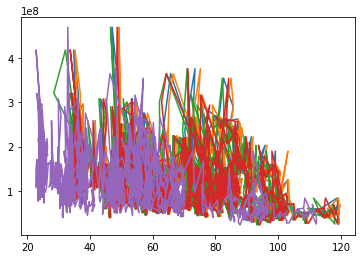

In [ ]:
plt.plot(x,y)
plt.show()

#SPLITTING OF DATASET INTO TRAIN AND TEST SET

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

#NORMALIZING DATA

In [ ]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
X_train_norm = norm.transform(x_train)

# transform testing data
X_test_norm = norm.transform(x_test)

print(X_train_norm)
print(X_test_norm)

[[0.64093883 0.64016692 0.66887254 0.64718581 0.43906546]
 [0.04217119 0.04203511 0.08831126 0.03507891 0.02267382]
 [0.23533809 0.23141745 0.26730985 0.22090006 0.14278218]
 ...
 [0.34527548 0.34038628 0.37722851 0.34058006 0.2975972 ]
 [0.56162905 0.58387071 0.59180354 0.58706963 0.37946128]
 [0.45860118 0.47102916 0.48154998 0.47502129 0.34337043]]
[[0.26332491 0.27202311 0.302376   0.27033857 0.24478185]
 [0.21484215 0.21672426 0.24996013 0.20255725 0.13092586]
 [0.4348664  0.45347718 0.46762872 0.45369948 0.32869661]
 ...
 [0.52595221 0.53473838 0.55582836 0.53734661 0.51028798]
 [0.33597425 0.34678544 0.37126454 0.3477431  0.27733607]
 [0.4775691  0.47809324 0.50942428 0.47726395 0.34491388]]


#ALGORITHM

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, n_estimators=65, random_state=42)

#FITTING OF TRAINING DATA

In [ ]:
rf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=65, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

#PREDICTIONS FOR OUR PROBLEM STATEMENT WITH THE RELATED GRAPHS

In [ ]:
pred = rf.predict(x_test)

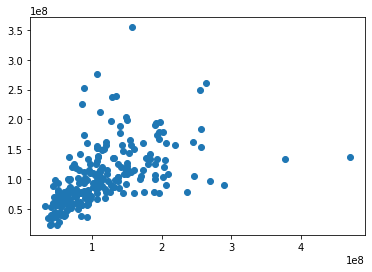

In [ ]:
plt.scatter(y_test,pred)

#EVALUATION

In [ ]:

print(metrics.accuracy_score(y_test, pred))

0.0


#SAVING THE MODEL USING PICKLE LIBRARY

In [ ]:
import pickle 

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(rf) 

# Load the pickled model 
model_from_pickle = pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
model_from_pickle.predict(x_test) 


array([147451500, 133828800, 115386600, 124687500, 143245200, 157825500,
        40270000,  78540700, 196617400, 110690300, 157125500,  27442300,
        97053600, 115581900,  81837700,  57574300, 157523100, 100366000,
        85931300,  62014400, 238632800,  84695800,  66306800, 115136000,
        80481800,  97909700,  78312500,  83256600, 204165500, 252394800,
       161329700,  89735800,  75207300,  44646000,  89053300,  22891800,
        98116900,  93088100,  81837700,  97920900, 115709300, 100768500,
        51949100, 125326600, 155967700,  55843900, 160688500,  82982200,
        75674900,  77338800,  48377000,  86879100,  79713900,  69399000,
        55933000, 125283900,  34968500,  72462600, 141283100,  98735000,
        36585000, 261159500, 108330600,  99621900,  61156900, 115021200,
        44915500, 125464500,  90862100,  76186600,  70716100, 125464500,
        91973000,  75207300,  93144800,  88763500, 173717600, 112342300,
       238002800,  78540700, 106409800, 108125500, 

#ACCURACY w.r.t TRAINED DATA

Confusion Matrix

In [ ]:
y_train = y_train[0:237]
results =confusion_matrix(y_train, pred)
print(results)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Precision, Recall, Support, Fscore

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_train, pred, average='macro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.001282051282051282, 0.002564102564102564, 0.0017094017094017094, None)

#ACCURACY w.r.t TEST DATA

Confusion Matrix

In [ ]:
results =confusion_matrix(y_test, pred)
print(results)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Precision, Recall, Support, Fscore

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, pred, average='macro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0, 0.0, None)